In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os

C:\Users\Krist\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getStatistics(files):
    if files == 1:
        filesForProcessing = availableFiles[:]
        
    elif isinstance(files,list):
        filesForProcessing = files[:]
    else:
        print("Incorrect format - please specify either a list or '1'")
    
    for element in filesForProcessing:
        print("-----------------------------------------------------------------------------------------------")
        print("The file being processed is: %s" % element)
        
        with open(path + "/"+element,"r") as file:
            temp = file.readlines()

        tempClean = [re.sub("[\n ]","",i) for i in temp]

        if len(tempClean[0]) == 1:

            tempClean = [int(i) for i in tempClean]

            uniqueVals, counts = np.unique(tempClean,return_counts = True)# Perhaps should listOfObs be sorted?

            if len(uniqueVals) > 50:
                print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
#                     answer = input("There are more than 50 unique values, do you want to see them? ")

#                     if (answer == 'yes') or (answer == 'Yes'):
#                         print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                         print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                plt.hist(tempClean)
                plt.title("Distribution of the data")
                plt.show()
            else:
                print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

        else:

            tempClean = [re.split(",",i) for i in tempClean]

            lenOfElements = len(tempClean[0])

            database = [[] for i in np.arange(lenOfElements)]

            # Dividing in the observations
            for observation in tempClean:
                for partial in enumerate(observation):

                    database[partial[0]].append(int(partial[1]))

            # Getting information on the content of each list in the database.
            print("\nThe file contains %i separate streams of values." % lenOfElements)
            for listOfObs in database:
                uniqueVals, counts = np.unique(listOfObs,return_counts = True)# Perhaps should listOfObs be sorted?

                if (all(counts == 1)):
                    answer = input("\nAll values of the variable currently being processed is equal to one, which indiates\
that the values are numberic of other values. Do you want to disregard the processing of these values? ")
                    if (answer == 'no') or (answer == 'No'):
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

                else:
                    if len(uniqueVals) > 50:
#                             answer = input("There are more than 50 unique values, do you want to see them? ")

#                             if (answer == 'yes') or (answer == 'Yes'):
#                                 print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                                 print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                        print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
                        plt.hist(listOfObs)
                        plt.title("Distribution of the data")
                        plt.show()
                    else:
                        print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

In [180]:
availableFolders = {}
folderCount = 0

for element in os.listdir("../../Exported_Data"):#os.listdir("../Assets/Exported_Data"):
    if ("txt" not in element) and ("meta" not in element):
        availableFolders[folderCount] = element
        folderCount += 1
        

In [181]:
print("The available folders, containing the data of interest, are:")
availableFolders

The available folders, containing the data of interest, are:


{0: 'BaseEnvironmentNoCurriculum',
 1: 'BaseEnvironmentNoCurriculum-1.1-0',
 2: 'BaseEnvironmentNoCurriculum-1.1.1-0',
 3: 'BaseEnvironmentNoCurriculum-1.2-0',
 4: 'CLStaticDynamicObstacles-1.0',
 5: 'CLStaticDynamicObstacles-1.0.1',
 6: 'CLStaticDynamicObstacles-1.0.2',
 7: 'CLStaticDynamicObstacles-1.1',
 8: 'CLStaticDynamicObstacles-1.2',
 9: 'CLStaticDynamicObstacles-1.3',
 10: 'CLStaticDynamicObstacles-1.4',
 11: 'CLStaticDynamicObstacles-1.5',
 12: 'CLStaticDynamicObstacles-1.6',
 13: 'CLStaticDynamicObstacles-1.7',
 14: 'CLStaticDynamicObstacles-1.8',
 15: 'CurriculumLearning',
 16: 'FullTrainingSession-1.0-0',
 17: 'FullTrainingSession-1.1-0',
 18: 'FullTrainingSession-1.2-0',
 19: 'FullTrainingSession-1.2.1-0',
 20: 'FullTrainingSession-1.3-0',
 21: 'FullTrainingSession-1.3.1-0',
 22: 'FullTrainingSession-1.3.2-0',
 23: 'FullTrainingSession-1.3.3-0',
 24: 'FullTrainingSession-1.3.4-0',
 25: 'FullTrainingSession-1.4.0-0',
 26: 'FullTrainingSession-1.4.1-0',
 27: 'FullTrainingSe

In [224]:
path = "../..//Exported_Data/"+availableFolders[5]# <- Choose the folders from above

## Statistics on the content of the files in the folder

In [13]:
availableFiles = [ele for ele in os.listdir(path) if "meta" not in ele]
print("The available files are: ")
availableFiles

The available files are: 


['posCount.txt', 'sensorCloudCount.txt', 'stepsToGoal.txt']

-----------------------------------------------------------------------------------------------
The file being processed is: posCount.txt

The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 10921, 1: 1350} 

-----------------------------------------------------------------------------------------------
The file being processed is: sensorCloudCount.txt

The file contains 2 separate streams of values.

The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 12271} 


The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 3046, 1: 9225} 

-----------------------------------------------------------------------------------------------
The file being processed is: stepsToGoal.txt

The file contains 3 separate streams of values.

The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 3046, 1: 9225} 


There are more than 50 unique values, so a hist

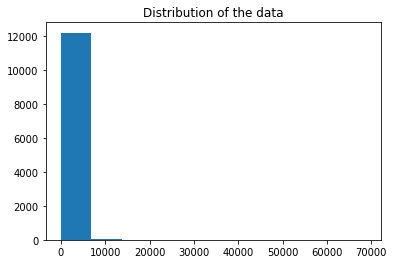


The unique values and their frequency count, presented as {unique Value: Count}, are:

{0: 12271} 



In [14]:
# List the files you want to see statistics on as a list, or enter "1" to get statistics for all files.
getStatistics(1)

### Looking closer at the number of steps taken by the agent in the _crowded area_.

In [25]:
# Reading in the data.
with open(path+"/stepsCA.txt","r") as file:
    content = file.readlines()

In [26]:
# The content is as follows: The first number is the number recorded from the AgentAction function and the second number is the 
# number recorded from the AgentObservation function.

# Cleaning and separating the two streams of data

steps_obs,steps_act = [],[]

for obs in content:
    cleanObs = re.split(",",re.sub("\n","",obs))
    
    steps_act.append(int(cleanObs[0]))
    steps_obs.append(int(cleanObs[1]))

steps_act = np.array(steps_act)
steps_obs = np.array(steps_obs)

if len(steps_act) != len(steps_obs):
    print("The number of observations in steps_act are: %i" % len(steps_act))
    print("The number of observations in steps_obs are: %i" % len(steps_obs))
else:
    print("The number of observations in both are: %i" % len(steps_act))

The number of observations in both are: 1365


In [52]:
sum(steps_act)

153401

In [76]:
pre_batch = 0
batch_means = []
step = int(len(steps_act)/10)

for batch in np.arange(step,len(steps_act),step=step):
    
    batch_means.append(steps_act[pre_batch:batch].mean())
    pre_batch += step

In [77]:
batch_means

[40.41968911917098,
 29.93782383419689,
 35.27979274611399,
 31.979274611398964,
 25.098445595854923,
 24.487046632124354,
 25.2279792746114,
 24.373056994818654,
 27.05699481865285,
 23.202072538860104]

## Basic Learning & Full SetUp No Curriculum

In [5]:
os.listdir("../../summaries_for_processing/GoalBrain_4_2/csv_output")

['BasicLearning-0.csv',
 'BasicLearning-0.txt',
 'CurriculumLearning-0.csv',
 'CurriculumLearning-0.txt',
 'FullTrainingSession-1.4-0.csv',
 'FullTrainingSession-1.4-0.txt',
 'FullTrainingSession-1.4.1-0.csv',
 'FullTrainingSession-1.4.1-0.txt',
 'FullTrainingSession-1.4.2-0.csv',
 'FullTrainingSession-1.4.2-0.txt',
 'FullTrainingSession-1.4.3-0.csv',
 'FullTrainingSession-1.4.3-0.txt',
 'FullTrainingSession-1.4.4-0.csv',
 'FullTrainingSession-1.4.4-0.txt',
 'FullTrainingSession-1.4.5-0.csv',
 'FullTrainingSession-1.4.5-0.txt']

In [95]:
BL_content_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/BasicLearning-0.csv", index_col=0)
FS_content_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/FullSetUpNoCL-1.0-0.csv", index_col=0)
FS_content_csv = FS_content_csv.iloc[:,0:100]

In [83]:
BL_content_csv

,2000.0,4000.0,6000.0,8000.0,10000.0,12000.0,14000.0,16000.0,18000.0,20000.0,...,182000.0,184000.0,186000.0,188000.0,190000.0,192000.0,194000.0,196000.0,198000.0,200000.0
1,-0.893448,-1.128152,-1.085956,-1.140089,-0.959375,-0.711800,-0.954091,-0.878300,0.053875,-0.943167,...,0.897396,0.897969,0.912909,0.908538,0.892228,0.889091,0.903921,0.901489,0.895765,0.902600
2,67.689651,86.043480,57.911766,70.321426,69.464287,76.720001,90.727272,79.320000,98.449997,137.266663,...,41.041668,40.812500,34.836365,36.584908,43.108696,44.363636,38.431374,39.404255,41.693878,38.959999
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.102150,0.321829,0.348755,0.269092,0.273218,0.246014,0.242299,0.299914,...,0.009923,0.009724,0.008158,0.008350,0.009987,0.013426,0.009205,0.009147,0.009962,0.008825
5,1.418938,1.418938,1.420066,1.421882,1.421882,1.422696,1.422941,1.422493,1.420177,1.420177,...,1.353981,1.353981,1.350850,1.350659,1.349753,1.347712,1.347712,1.346719,1.346232,1.346167
6,0.000299,0.000298,0.000297,0.000296,0.000295,0.000293,0.000292,0.000291,0.000290,0.000289,...,0.000191,0.000190,0.000189,0.000188,0.000187,0.000185,0.000184,0.000183,0.000182,0.000181
7,-0.085922,-0.077174,-0.105501,-0.122261,-0.144158,-0.167824,-0.196744,-0.201990,-0.135411,-0.199345,...,0.753892,0.745801,0.768372,0.761534,0.741385,0.747904,0.762253,0.743216,0.753643,0.758598


In [85]:
step = np.array(BL_content_csv.columns).astype(float)

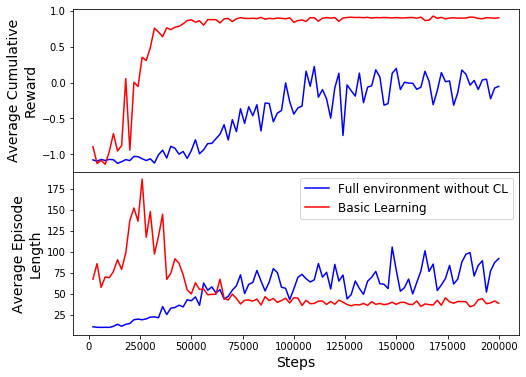

In [112]:
fig,(ax,bx) = plt.subplots(2,1,figsize=(8,6),sharex=True,gridspec_kw = {'wspace':0, 'hspace':0})
ax.plot(step,FS_content_csv.loc[1],color="b")
ax.plot(step,BL_content_csv.loc[1],c = 'r')

ax.set_ylabel("Average Cumulative\nReward",fontsize=14)

bx.plot(step,FS_content_csv.loc[2],color='b',label="Full environment without CL")
bx.plot(step,BL_content_csv.loc[2],color='r',label='Basic Learning')
bx.set_ylabel("Average Episode\nLength",fontsize=14)
bx.set_xlabel("Steps",fontsize = 14)
bx.legend(fontsize=12)
# plt.savefig("Graphs/DifferentLooksOfLearning.jpg",bbox_inches="tight")
plt.show()

## First training session using curriculum learning

In [11]:
firstCL_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/CurriculumLearning-0.csv", index_col=0,na_values=0)

In [12]:
firstCL_csv = firstCL_csv.fillna(0)

In [13]:
firstCL_csv

,2000.0,4000.0,6000.0,8000.0,10000.0,12000.0,14000.0,16000.0,18000.0,20000.0,...,982000.0,984000.0,986000.0,988000.0,990000.0,992000.0,994000.0,996000.0,998000.0,1000000.0
1,-0.967770,-0.968125,-0.905000,-0.837167,-1.032407,-0.520761,-0.723816,-0.929167,-0.917000,-0.656667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
2,51.945946,62.250000,56.117645,68.199997,72.222221,86.565216,100.052635,105.000000,286.799988,196.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000e+00
4,0.000000,0.000000,0.118596,0.420656,0.436509,0.384249,0.377563,0.388973,0.786997,0.502139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
5,1.418938,1.418938,1.420179,1.422479,1.422479,1.421532,1.421211,1.420866,1.418728,1.418728,...,1.307127,1.307120,1.307098,1.307098,1.307086,1.307080,1.307080,1.307080,1.307080e+00,1.307080e+00
6,0.000300,0.000299,0.000298,0.000298,0.000297,0.000297,0.000296,0.000295,0.000295,0.000294,...,0.000006,0.000005,0.000004,0.000004,0.000003,0.000003,0.000002,0.000001,8.999506e-07,2.999507e-07
7,0.130058,0.152667,0.145008,0.103606,0.064751,0.082076,0.101633,0.082155,0.101976,0.076790,...,0.127381,0.082667,0.121396,0.039887,0.033598,0.011775,0.009039,0.028154,8.652220e-03,7.512131e-03


In [14]:
step_CL = np.array(firstCL_csv.columns).astype(float)

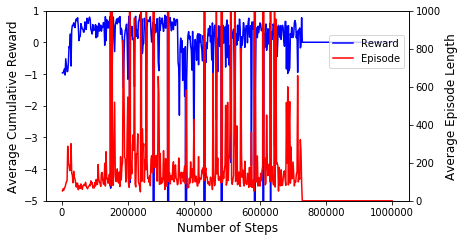

In [20]:
fig,ax1 = plt.subplots(figsize=(6.5,3.5))
plt1 = ax1.plot(step_CL,firstCL_csv.loc[1],color="b",label="Reward")
ax1.set_xlabel("Number of Steps",fontsize = 12)
ax1.set_ylabel("Average Cumulative Reward",fontsize=12)
ax1.set_ylim((-5,1))
# ax1.set_yscale('log')
ax2 = ax1.twinx()
plt2 = ax2.plot(step_CL,firstCL_csv.loc[2],color='r',label="Episode")
ax2.set_ylabel("Average Episode Length",fontsize=12)
ax2.set_ylim((0,1000))
# ax2.set_yscale('log')
# Legends
plts = plt1 + plt2
labels = [l.get_label() for l in plts]
plt.legend(plts,labels,loc=0,bbox_to_anchor=(1,0.9))#bbox_to_anchor=(1.35,1)

# plt.savefig("Graphs/BasicLearningEnvironment.jpg",bbox_inches="tight")
plt.show()

### The effect of restricting the maximum steps

## CLStaticDynamicObstacles

In [265]:
path

'../..//Exported_Data/CLStaticDynamicObstacles-1.0.1'

In [225]:
# Reading in the data.
with open(path+"/stepsToGoal.txt","r") as file:
    content = file.readlines()

In [226]:
# The content is as follows: The first number is the number recorded from the AgentAction function and the second number is the 
# number recorded from the AgentObservation function.

# Cleaning and separating the two streams of data

#### For no-maximum-steps data ########### 
goalNoMax,episodeLengthNoMax,difficultAreaNoMax = [],[],[]

for obs in content:
    cleanObs = re.split(",",re.sub("\n","",obs))
    
    episodeLengthNoMax.append(int(cleanObs[1]))
    goalNoMax.append(int(cleanObs[0]))
    difficultAreaNoMax.append(int(cleanObs[2]))
    
if len(episodeLengthNoMax) != len(goal):
    print("The number of observations in steps_act are: %i" % len(episodeLengthNoMax))
    print("The number of observations in steps_obs are: %i" % len(goalNoMax))
else:
    print("The number of observations in both are: %i" % len(episodeLengthNoMax))
    
# #### For maximum-steps data ##############
# goal,episodeLength,difficultArea = [],[],[]

# for obs in content:
#     cleanObs = re.split(",",re.sub("\n","",obs))
    
#     episodeLength.append(int(cleanObs[1]))
#     goal.append(int(cleanObs[0]))
#     difficultArea.append(int(cleanObs[2]))
    
# if len(episodeLength) != len(goal):
#     print("The number of observations in steps_act are: %i" % len(episodeLength))
#     print("The number of observations in steps_obs are: %i" % len(goal))
# else:
#     print("The number of observations in both are: %i" % len(episodeLength))

The number of observations in steps_act are: 7487
The number of observations in steps_obs are: 7487


## No maximum steps

In [227]:
max(episodeLengthNoMax)

34223

In [235]:
min(episodeLengthNoMax)

1

In [238]:
len(episodeLengthNoMax)

7487

In [228]:
np.unique(np.array(difficultAreaNoMax),return_counts=True)

(array([0, 1]), array([6765,  722], dtype=int64))

In [229]:
goalDANoMax = [1 if (i == 1) and (j ==1) else 0 for i,j in zip(difficultAreaNoMax,goalNoMax) ]

In [230]:
np.unique(goalDANoMax,return_counts=True)

(array([0, 1]), array([7114,  373], dtype=int64))

## Maximum steps equal to 4000

In [207]:
max(episodeLength)

4000

In [239]:
len(episodeLength)

7736

In [240]:
min(episodeLength)

1

In [255]:
len(np.array(episodeLength)[np.array(episodeLength)>=4000])/len(episodeLength)

0.0031023784901758012

In [209]:
np.unique(np.array(difficultArea),return_counts=True)

(array([0, 1]), array([6914,  822], dtype=int64))

In [210]:
goalDA = [1 if (i == 1) and (j ==1) else 0 for i,j in zip(difficultArea,goal) ]

In [211]:
np.unique(goalDA,return_counts=True)

(array([0, 1]), array([7286,  450], dtype=int64))

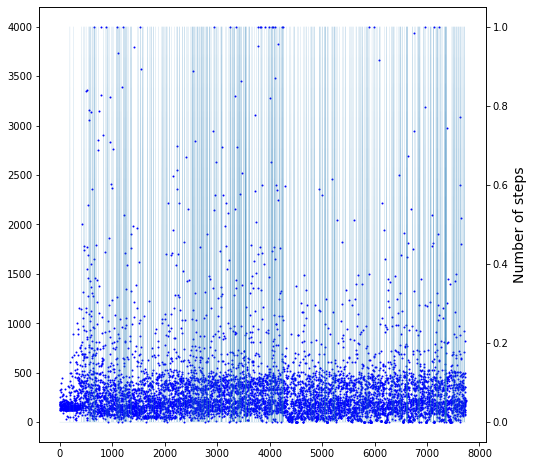

In [212]:
fig,ax = plt.subplots(figsize=(8,8))

ax.plot(np.arange(len(episodeLength)),episodeLength, linewidth=0, marker="o",markersize=1,c='blue')
bx = ax.twinx()
bx.plot(np.arange(len(episodeLength)),goalDA,linewidth=0.1)
plt.xlabel("Episodes",fontsize=14)
plt.ylabel('Number of steps',fontsize=14)
# plt.savefig('graphs/numberOfStepsPerEpisode.jpg',bbox_inches='tight')
plt.show()

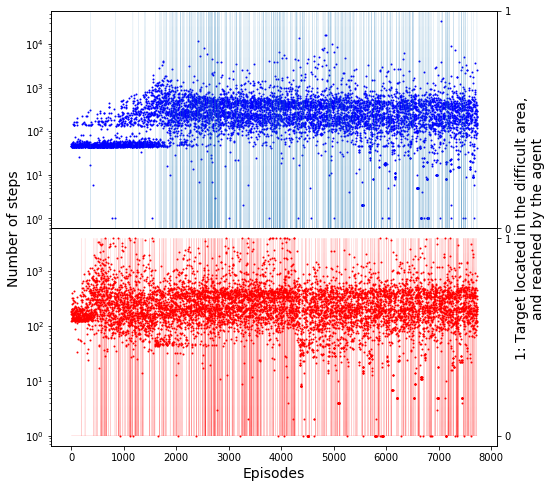

In [271]:
## NOTE: CLStaticDynamicObstacles-1.7 and CLStaticDynamicObstacles.1.0.1 where used

fig,(ax,bx) = plt.subplots(2,1,figsize=(8,8),gridspec_kw = {'wspace':0, 'hspace':0})

ax.plot(np.arange(len(episodeLengthNoMax)),episodeLengthNoMax, linewidth=0,
        marker="o",markersize=1,c='blue')
ax2 = ax.twinx()
ax2.plot(np.arange(len(episodeLengthNoMax)),goalDANoMax,linewidth=0.1)

# Plotting max-step-4000 obs
bx.plot(np.arange(len(episodeLength)),episodeLength, linewidth=0,
        marker="o",markersize=1,c='red')
bx2 = bx.twinx()
bx2.plot(np.arange(len(episodeLength)),goalDA,linewidth=0.1,c='red')
ax2.locator_params(axis='y', nbins=1)
bx2.locator_params(axis='y', nbins=1)
ax.set_yscale('log')
bx.set_yscale('log')
bx.set_xlabel('Episodes',fontsize=14)
ax.set_ylabel('Number of steps',fontsize=14,position=(1,0))
ax2.set_ylabel('1: Target located in the difficult area,\nand reached by the agent',
               fontsize=14,position=(1,0))
ax2.set_ylim((0,1))
# plt.savefig('graphs/numberOfStepsPerEpisode_new.jpg',bbox_inches='tight')
plt.show()

In [261]:
maxStepsH = []
lostObsH = []
maxStepsL = []
lostObsL = []
for treshold in np.arange(100,1100,100):
    #treshold = 10000
#     print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
#                                                                                                  sum(np.greater(np.array(episodeLength),treshold))\
#                                                                                                  ,sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength)))
    
    print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
                                                                                                 len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])\
                                                                                                 ,len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax)))
    maxStepsL.append(treshold)
#     lostObsL.append(sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength))
    lostObsL.append(len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax))
for treshold in np.arange(1000,11000,1000):
    #treshold = 10000
#     print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
#                                                                                                  sum(np.greater(np.array(episodeLength),treshold))\
#                                                                                                  ,sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength)))
    print("Number of observations above %i: %i, equivalent to %.4f of the total observations" % (treshold,\
                                                                                                 len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])\
                                                                                                 ,len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax)))
    maxStepsH.append(treshold)

#     lostObsH.append(sum(np.greater(np.array(episodeLength),treshold))/len(episodeLength))
    lostObsH.append(len(np.array(episodeLengthNoMax)[np.array(episodeLengthNoMax)>=treshold])/len(episodeLengthNoMax))

Number of observations above 100: 5460, equivalent to 0.7293 of the total observations
Number of observations above 200: 4001, equivalent to 0.5344 of the total observations
Number of observations above 300: 2777, equivalent to 0.3709 of the total observations
Number of observations above 400: 1887, equivalent to 0.2520 of the total observations
Number of observations above 500: 1094, equivalent to 0.1461 of the total observations
Number of observations above 600: 686, equivalent to 0.0916 of the total observations
Number of observations above 700: 495, equivalent to 0.0661 of the total observations
Number of observations above 800: 383, equivalent to 0.0512 of the total observations
Number of observations above 900: 312, equivalent to 0.0417 of the total observations
Number of observations above 1000: 261, equivalent to 0.0349 of the total observations
Number of observations above 1000: 261, equivalent to 0.0349 of the total observations
Number of observations above 2000: 97, equivale

In [262]:
pd.DataFrame([np.array(lostObsL).round(3),
             np.array(maxStepsH).astype(int),
             np.array(lostObsH).round(3)],columns=maxStepsL)

,100,200,300,400,500,600,700,800,900,1000
0,0.729,0.534,0.371,0.252,0.146,0.092,0.066,0.051,0.042,0.035
1,1000.000,2000.000,3000.000,4000.000,5000.000,6000.000,7000.000,8000.000,9000.000,10000.000
2,0.035,0.013,0.008,0.005,0.003,0.002,0.002,0.001,0.001,0.001


### Extracting the data from TensorBoard

In [264]:
fileDict = {i: file for i,file in enumerate(os.listdir("../../summaries_for_processing/GoalBrain_4_2/csv_output"))}
fileDict

{0: 'BaseEnvironment-1.2.11-0.csv',
 1: 'BaseEnvironment-1.2.11-0.txt',
 2: 'BaseEnvironment-1.2.12-0.csv',
 3: 'BaseEnvironment-1.2.12-0.txt',
 4: 'BaseEnvironment-1.2.13-0.csv',
 5: 'BaseEnvironment-1.2.13-0.txt',
 6: 'BaseEnvironment-1.2.14-0.csv',
 7: 'BaseEnvironment-1.2.14-0.txt',
 8: 'BaseEnvironment-1.2.15-0.csv',
 9: 'BaseEnvironment-1.2.15-0.txt',
 10: 'BaseEnvironment-1.2.16-0.csv',
 11: 'BaseEnvironment-1.2.16-0.txt',
 12: 'BaseEnvironment-1.2.17-0.csv',
 13: 'BaseEnvironment-1.2.17-0.txt',
 14: 'BasicLearning-0.csv',
 15: 'BasicLearning-0.txt',
 16: 'CLStaticDynamicObstacles-1.0-0.csv',
 17: 'CLStaticDynamicObstacles-1.0-0.txt',
 18: 'CLStaticDynamicObstacles-1.1-0.csv',
 19: 'CLStaticDynamicObstacles-1.1-0.txt',
 20: 'CLStaticDynamicObstacles-1.2-0.csv',
 21: 'CLStaticDynamicObstacles-1.2-0.txt',
 22: 'CLStaticDynamicObstacles-1.3-0.csv',
 23: 'CLStaticDynamicObstacles-1.3-0.txt',
 24: 'CLStaticDynamicObstacles-1.4-0.csv',
 25: 'CLStaticDynamicObstacles-1.4-0.txt',
 26: '

In [266]:
# CLStaticDynamicObstacles without maximum steps
CLSDO_WOMS_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[32], index_col=0,na_values=0).fillna(0)
# CLStaticDynamicObstacles with maximum steps (10000)
CLSDO_WMS_csv = pd.read_csv("../../summaries_for_processing/GoalBrain_4_2/csv_output/"+fileDict[28], index_col=0,na_values=0).fillna(0)

In [268]:
clippedCLSDO_WOMS = CLSDO_WOMS_csv.iloc[0:3,0:250]

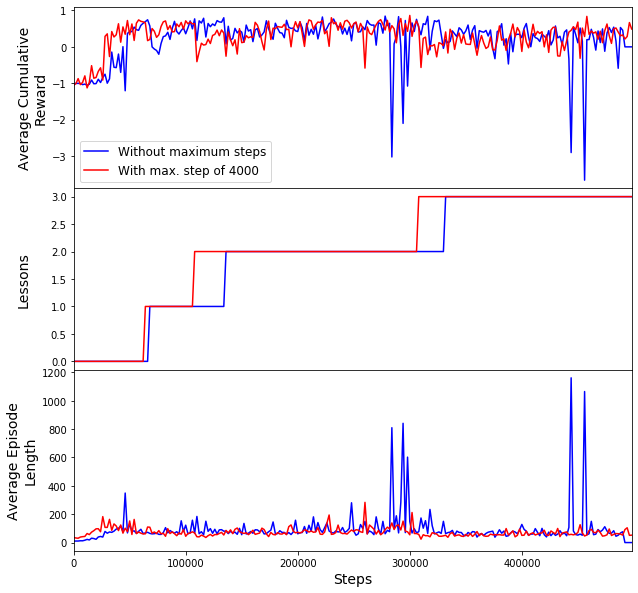

In [270]:
fig,(ax,bx,cx) = plt.subplots(3,1,figsize=(10,10),gridspec_kw = {'wspace':0, 'hspace':0})#sharex=True
plt.locator_params(axis='x', nbins=5)

# Plotting the ACR
clippedCLSDO_WOMS.loc[[1]].T.plot(ax=ax,c='blue')
CLSDO_WMS_csv.loc[1].T.plot(ax=ax,c='red')

# Second plot, changes in lessons
clippedCLSDO_WOMS.loc[3].T.plot(ax=bx,c='blue')
CLSDO_WMS_csv.loc[3].T.plot(ax=bx,c='red')

# Third plot, AEL
clippedCLSDO_WOMS.loc[[2]].T.plot(ax=cx,c="blue")
CLSDO_WMS_csv.loc[2].T.plot(ax=cx,c="red")

# Disabling the irrelvant x-axis
ax.get_xaxis().set_visible(False)
bx.get_xaxis().set_visible(False)

# Controling the tick labels
cx.set_xticklabels(np.arange(0,500000,100000).astype(str))

# Specifying the legends
ax.legend(['Without maximum steps','With max. step of 4000'],fontsize=12)#,bbox_to_anchor=(1.3,1)
cx.get_legend().remove()

# Add y-labels
ax.set_ylabel("Average Cumulative\nReward",fontsize=14)
bx.set_ylabel("Lessons\n ",fontsize=14)
cx.set_ylabel("Average Episode\nLength",fontsize=14)
cx.set_xlabel("Steps",fontsize=14)
# plt.savefig("graphs/EffectOfMaxSteps_new.jpg",bbox_inches="tight")
plt.show()